In [1]:
import tweepy as tp

In [2]:
consumer_key = 'tt6FGjUVqVV4Bga8t2a3rmRR7'
consumer_secret = 'YSZFKghu0qeP1AVgW7u4stwVFWjBw5zNtOOdOGWw1XOs3hUjlP'
access_token = '1288033810722852869-AGEa1bnXoU4YN4BeBEAnhA2bBUNLxG'
access_token_secret = 'bdLQrVlDKDT0eDNGmPMKif22EHm0eGaQRKAnnyaLUizCz'

In [3]:
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
api = tp.API(auth)

In [5]:
indo_woe = 23424846

In [6]:
trends = api.trends_place(indo_woe)

In [7]:
trends

[{'trends': [{'name': '#WayV_BadAliveENGver',
    'url': 'http://twitter.com/search?q=%23WayV_BadAliveENGver',
    'promoted_content': None,
    'query': '%23WayV_BadAliveENGver',
    'tweet_volume': 61195},
   {'name': '#SiapSiapGiveawayShopee',
    'url': 'http://twitter.com/search?q=%23SiapSiapGiveawayShopee',
    'promoted_content': None,
    'query': '%23SiapSiapGiveawayShopee',
    'tweet_volume': None},
   {'name': '#HTICoronaFPIdibenciRakyat',
    'url': 'http://twitter.com/search?q=%23HTICoronaFPIdibenciRakyat',
    'promoted_content': None,
    'query': '%23HTICoronaFPIdibenciRakyat',
    'tweet_volume': None},
   {'name': '#KurbanSehat',
    'url': 'http://twitter.com/search?q=%23KurbanSehat',
    'promoted_content': None,
    'query': '%23KurbanSehat',
    'tweet_volume': None},
   {'name': '#1stSINGLEALBUM',
    'url': 'http://twitter.com/search?q=%231stSINGLEALBUM',
    'promoted_content': None,
    'query': '%231stSINGLEALBUM',
    'tweet_volume': 125646},
   {'name': 'N

In [8]:
for item in (trends[0]['trends']):
    print(item['name'])

#WayV_BadAliveENGver
#SiapSiapGiveawayShopee
#HTICoronaFPIdibenciRakyat
#KurbanSehat
#1stSINGLEALBUM
NCT 2020
Hai R
BRIGHTENING ESSENCE
pengingat
Pendekar Arwah
Tipex
Baper
Mas Agung
Changsub
Puasa
Pange
WHITE VER
Dadar
mnet
TNI AU
o p e n
dilraba
PKTD
MINAT INFO DM AJA
tai lembu
Piring
7dream
morningg
Kamen Rider
Ada 5
Idul Adha
Selamat Milad
Kim Jaehwan
#KITACintaLaguAnak
#UMYMengabdi
#SeasonOfYouTS2
#DukungBPIPjagaPancasila
#UnairKampusMahal
#IndonesiaNyarisKomunis
#JKWPHPTerus
#BrightInspiresUs
#sapamantan
#Arafah
#VMAs2020
#KomunisBenciKhilafah
#KimDongWook
#milad111muhammadiyah
#10100dayswithjin
#RabuAmbyar
#BikinMertuaHappy


# # Sentiment Analysisi

In [3]:
import tweepy
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
search_words = "covid"
date_since = "2020-07-23"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search,
        q=new_search,
        lang="id",
        since=date_since).items(10)

In [5]:
items = []
for tweet in tweets:
    item = []
    item.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split()))
    items.append(item)
hasil = pd.DataFrame(data=items, columns=['tweet'])

In [24]:
pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()

S = []

for item in items:
    count_p = 0
    count_n = 0
    for kata_pos in pos_kata:
        if kata_pos.strip() in item[0]:
            count_p +=1
    for kata_neg in neg_kata:
        if kata_neg.strip() in item[0]:
            count_n +=1
#     print ("positif: "+str(count_p))
#     print ("negatif: "+str(count_n))
    S.append(count_p - count_n)

hasil["value"] = S
print ("Nilai rata-rata: "+str(np.mean(hasil["value"])))
print ("Standar deviasi: "+str(np.std(hasil["value"])))

Nilai rata-rata: -0.6
Standar deviasi: 2.4576411454889016


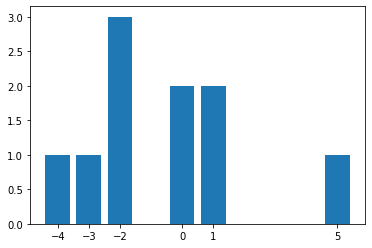

In [25]:
labels, counts = np.unique(hasil["value"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()